# Metody esploracji danych

## Lab nr. 1 and 2

In [1]:
# Import libraries
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define paths
train_data_path = Path(os.getcwd()).parent / 'data' / 'fb_data_train.csv'
test_data_path = Path(os.getcwd()).parent / 'data' / 'fb_data_test.csv'

In [3]:
# Load data
train_df = pd.read_csv(train_data_path, index_col='Rok')
test_df = pd.read_csv(test_data_path, index_col='Rok')

## Look at the data

In [5]:
train_df.head()

,Przych,Zysk,Zatr,User
Rok,,,,
2008,272,-56,850,148
2009,777,229,1218,360
2010,1974,606,2127,608
2011,3711,1000,3200,845
2012,5089,53,4619,1056


In [6]:
test_df.head()

,Przych,Zysk,Zatr,User
Rok,,,,
2018,55838,22112,39094,2255
2019,70697,18485,50064,2434
2020,85965,29146,63615,2710
2021,117929,39370,77412,2892


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2008 to 2017
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Przych  10 non-null     int64
 1   Zysk    10 non-null     int64
 2   Zatr    10 non-null     int64
 3   User    10 non-null     int64
dtypes: int64(4)
memory usage: 400.0 bytes


In [8]:
train_df.describe()

,Przych,Zysk,Zatr,User
count,10.000000,10.000000,10.000000,10.000000
mean,11838.000000,3611.100000,8239.400000,1121.800000
std,13325.704351,5310.362814,7931.401518,644.457705
min,272.000000,-56.000000,850.000000,148.000000
25%,2408.250000,323.250000,2395.250000,667.250000
50%,6480.500000,1250.000000,5478.000000,1142.000000
75%,16562.500000,3501.000000,11818.000000,1541.500000
max,40653.000000,15934.000000,25105.000000,2129.000000


## Plots

<Axes: xlabel='Rok'>

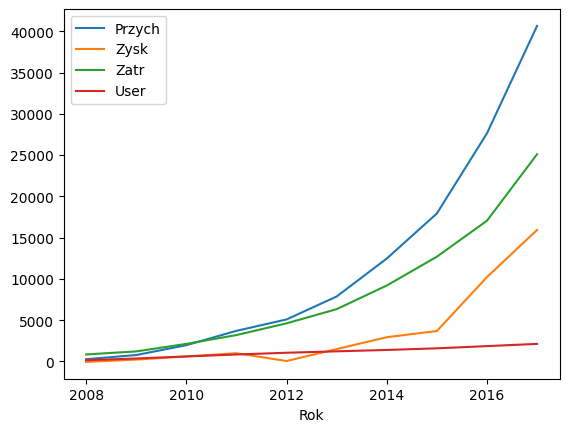

In [9]:
train_df.plot()

<Axes: xlabel='Rok'>

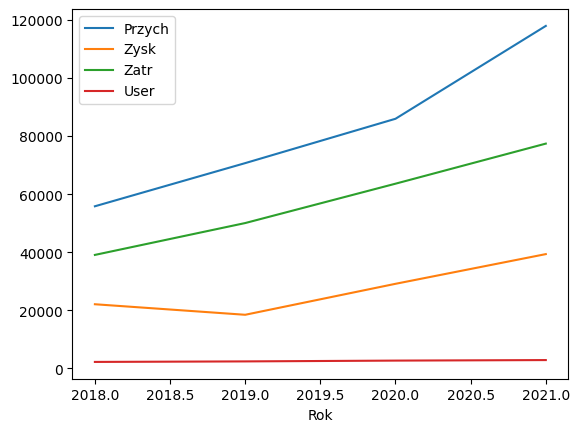

In [12]:
test_df.plot()

array([<Axes: xlabel='Rok'>, <Axes: xlabel='Rok'>, <Axes: xlabel='Rok'>,
       <Axes: xlabel='Rok'>], dtype=object)

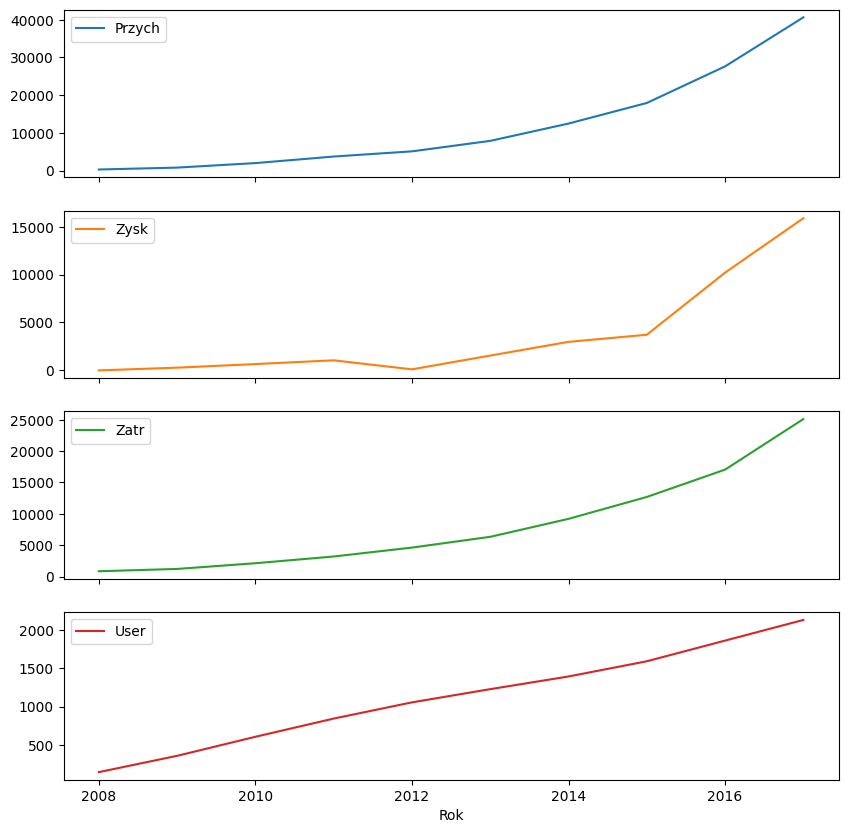

In [13]:
train_df.plot(subplots=True, figsize=(10, 10))

## Distribution

array([[<Axes: title={'center': 'Przych'}>,
        <Axes: title={'center': 'Zysk'}>],
       [<Axes: title={'center': 'Zatr'}>,
        <Axes: title={'center': 'User'}>]], dtype=object)

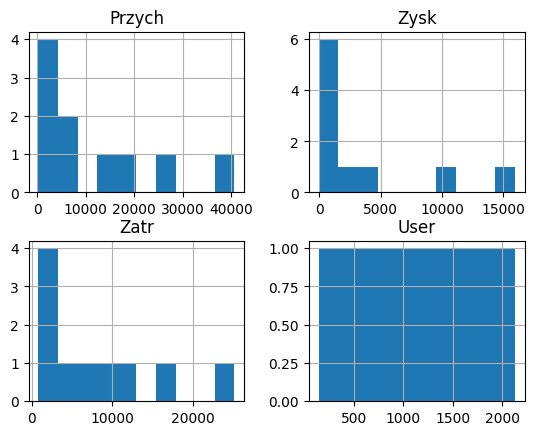

In [14]:
train_df.hist()

Przych       Axes(0.125,0.53;0.352273x0.35)
Zysk      Axes(0.547727,0.53;0.352273x0.35)
Zatr         Axes(0.125,0.11;0.352273x0.35)
User      Axes(0.547727,0.11;0.352273x0.35)
dtype: object

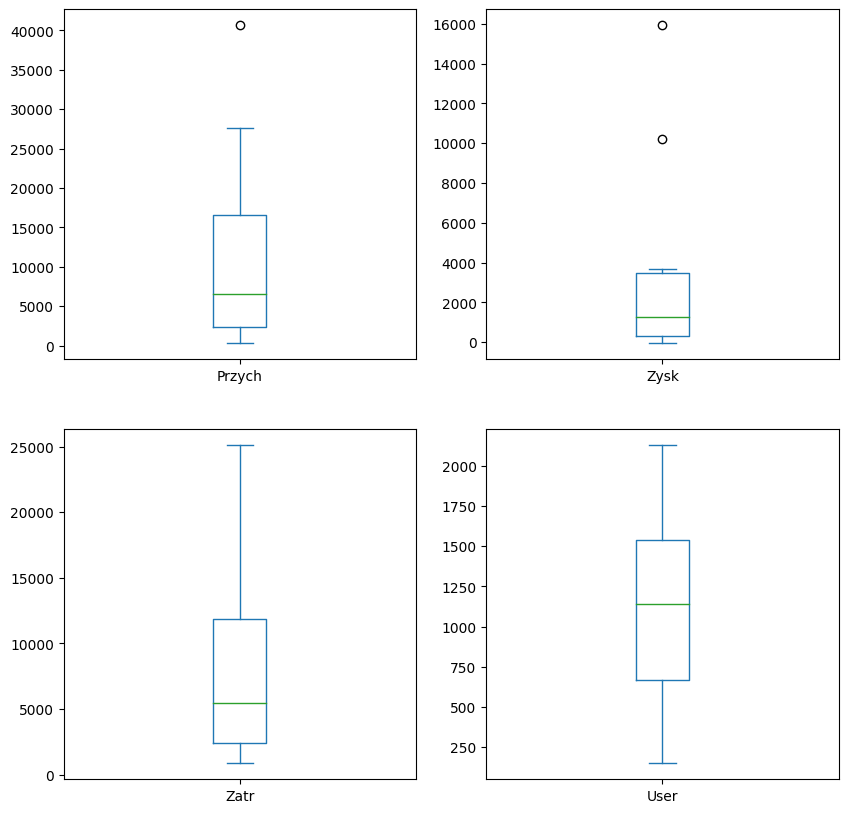

In [15]:
train_df.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(10, 10))

## Correlation

<Axes: >

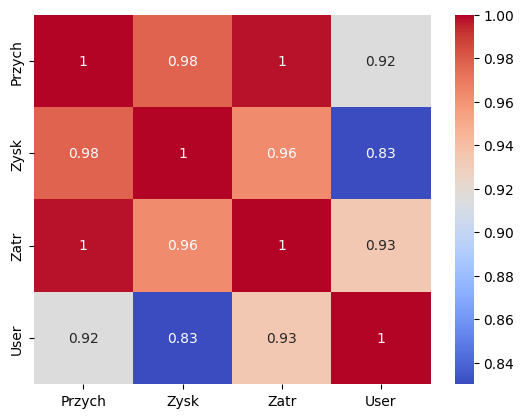

In [16]:
corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Modele

## Linear regression

Simple linear regression for one independent variable (users) and one dependent variable (incone).

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X_train = train_df["User"].values.reshape(-1, 1)
y_train = train_df["Przych"].values.reshape(-1, 1)
X_test = test_df["User"].values.reshape(-1, 1)
y_test = test_df["Przych"].values.reshape(-1, 1)

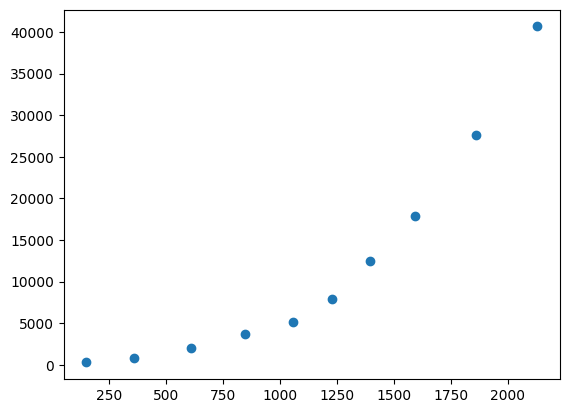

In [30]:
plt.scatter(X_train, y_train)

In [18]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

### Plot linear regression

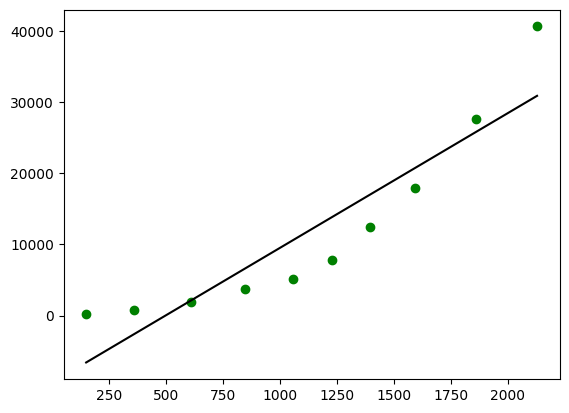

In [34]:
# Plot the data and the model prediction
plt.scatter(X_train, y_train, color='g')
plt.plot(X_train, linear_regression.predict(X_train), color='k')

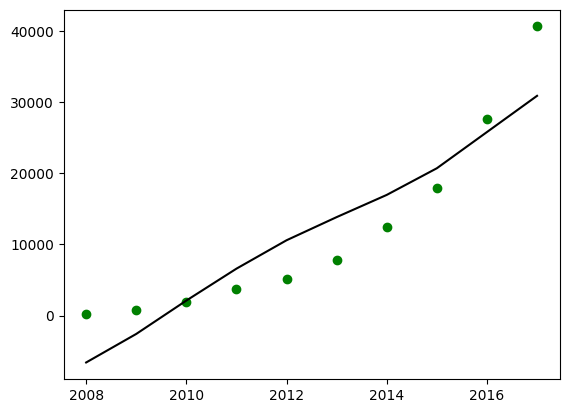

In [38]:
# Plot the data where x axis is year and y axis is the income
plt.scatter(train_df.index, y_train, color='g')
plt.plot(train_df.index, linear_regression.predict(X_train), color='k')

## Predictions

In [22]:
y_pred = linear_regression.predict(X_test)

In [44]:
for i in range(len(y_pred)):
    print(f"Prediction for year {test_df.index[i]}: {y_pred[i][0]:.2f} $ (actual: {y_test[i][0]:.2f} $)")

Prediction for year 2018: 33284.79 $ (actual: 55838.00 $)
Prediction for year 2019: 36672.52 $ (actual: 70697.00 $)
Prediction for year 2020: 41896.06 $ (actual: 85965.00 $)
Prediction for year 2021: 45340.56 $ (actual: 117929.00 $)


### Plot predictions

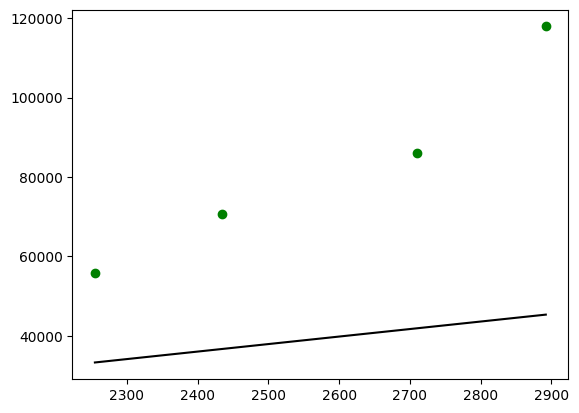

In [46]:
# Plot the test data and the model prediction
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, linear_regression.predict(X_test), color='k')

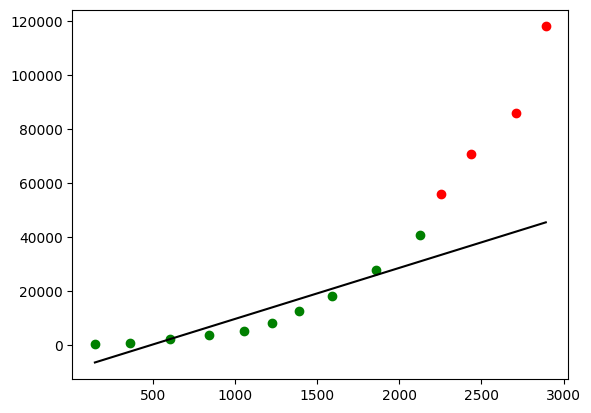

In [48]:
# Plot train and test data
X = np.concatenate((X_train, X_test))
plt.scatter(X_train, y_train, color='g')
plt.scatter(X_test, y_test, color='r')
plt.plot(X, linear_regression.predict(X), color='k')

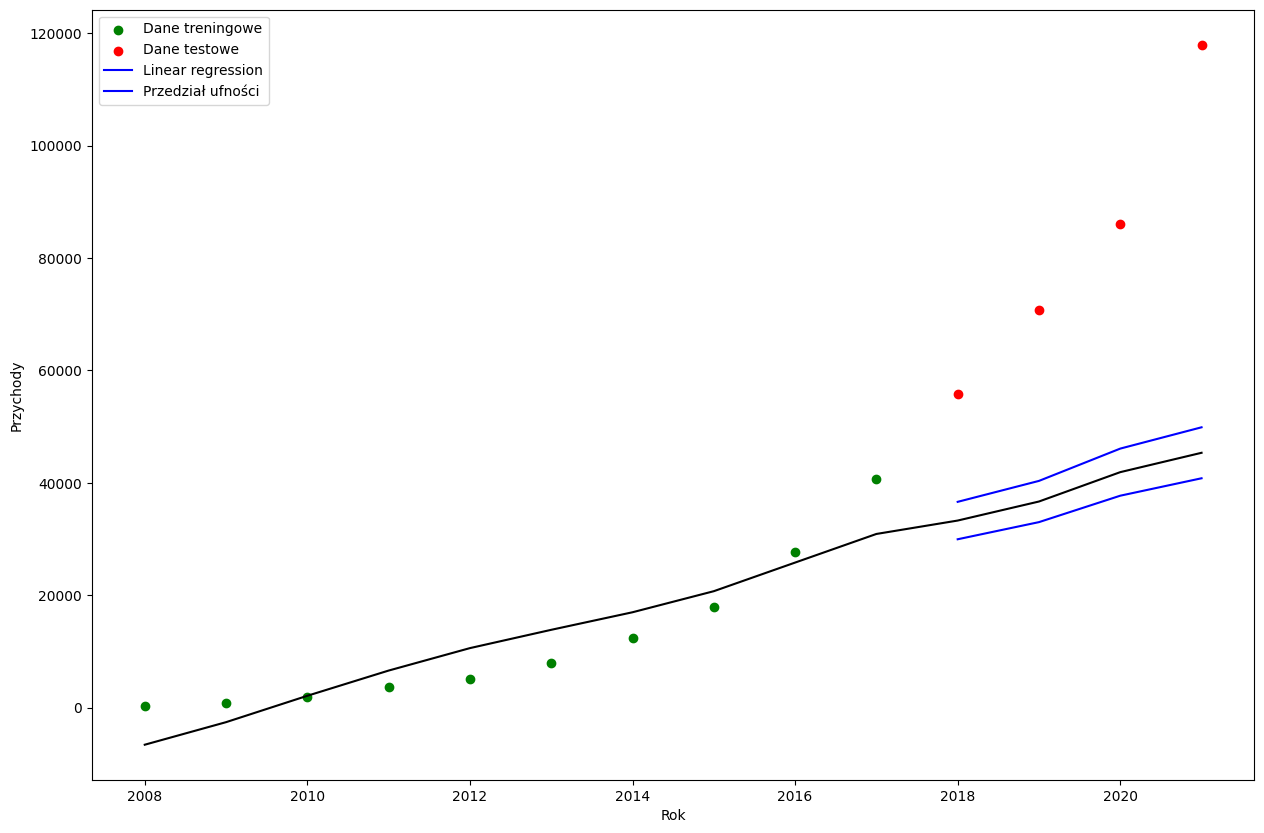

In [19]:
# Plot train and test data with years on x axis
confidence_interval = 0.1
y_pred = linear_regression.predict(X_test)
y_pred_min = y_pred - confidence_interval * y_pred
y_pred_max = y_pred + confidence_interval * y_pred
train_test_df = pd.concat([train_df, test_df])
X = np.concatenate((X_train, X_test))
plt.figure(figsize=(15, 10))
plt.scatter(train_df.index, y_train, color='g')
plt.scatter(test_df.index, y_test, color='r')
plt.plot(test_df.index, y_pred_min, color='b')
plt.plot(test_df.index, y_pred_max, color='b')
plt.plot(train_test_df.index, linear_regression.predict(X), color='k')
plt.xlabel('Rok')
plt.ylabel('Przychody')
plt.legend(['Dane treningowe', 'Dane testowe', 'Linear regression', 'Przedział ufności'])
plt.show()


### Evaluate model

In [17]:
# Import metrics
from sklearn import metrics

In [23]:
# Print metrics
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")

Mean Absolute Error: 43308.77
Mean Squared Error: 2219366446.98
Root Mean Squared Error: 47110.15


### Look at the model coefficients

In [8]:
# Print linear regression equation
print(f"Linear regression equation: y = {linear_regression.coef_[0][0]:.2f} * x + {linear_regression.intercept_[0]:.2f}")

Linear regression equation: y = 18.93 * x + -9393.03


## Multiple linear regression

Multiple linear regression is for more than one independent variable (Zysk, Zatr, User) and one dependent variable (Przych).

In [42]:
# Prepare data for multiple linear regression
X_train = train_df.drop("Przych", axis=1)
y_train = train_df["Przych"].values.reshape(-1, 1)
X_test = test_df.drop("Przych", axis=1)
y_test = test_df["Przych"].values.reshape(-1, 1)

In [43]:
# Fit the model
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train, y_train)

LinearRegression()

### Plot multiple linear regression

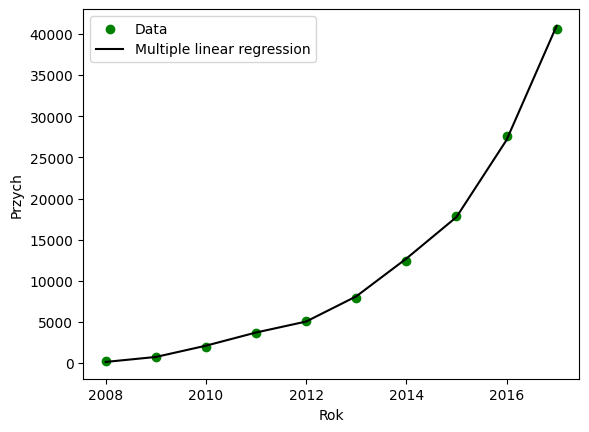

In [9]:
# Plot multiple linear regression equation with train data
plt.scatter(train_df.index, y_train, color='g')
plt.plot(train_df.index, multiple_linear_regression.predict(X_train), color='k')
plt.xlabel('Rok')
plt.ylabel('Przych')
plt.legend(['Data', 'Multiple linear regression'])
plt.show()

### Predictions

In [44]:
y_pred = multiple_linear_regression.predict(X_test)

In [45]:
for i in range(len(y_pred)):
    print(f"Prediction for year {test_df.index[i]}: {y_pred[i][0]:.2f} $ (actual: {y_test[i][0]:.2f} $)")

Prediction for year 2018: 63073.78 $ (actual: 55838.00 $)
Prediction for year 2019: 75733.75 $ (actual: 70697.00 $)
Prediction for year 2020: 99678.27 $ (actual: 85965.00 $)
Prediction for year 2021: 123733.11 $ (actual: 117929.00 $)


### Plot predictions

/root/repo/med_lab/.venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


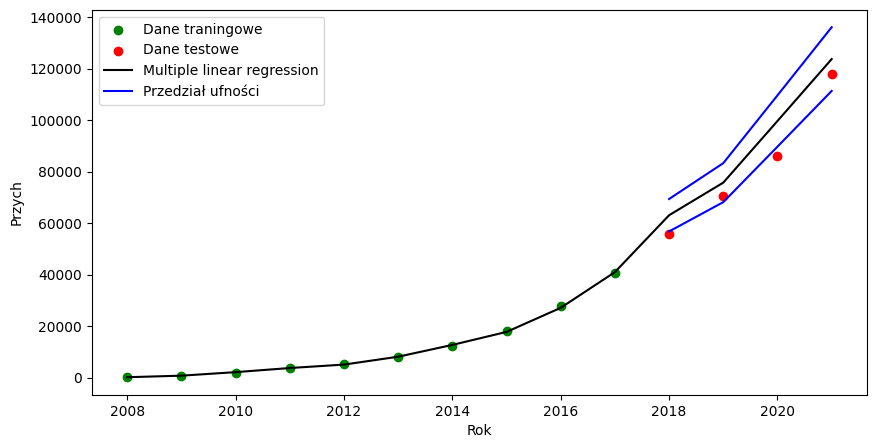

In [22]:
# Plot multiple linear regression with train and test data
confidence_interval = 0.1
X = np.concatenate((X_train, X_test))
y_pred = multiple_linear_regression.predict(X_test)
y_pred_min = y_pred - confidence_interval * y_pred
y_pred_max = y_pred + confidence_interval * y_pred
train_test_df = pd.concat([train_df, test_df])
plt.scatter(train_df.index, y_train, color='g')
plt.scatter(test_df.index, y_test, color='r')
plt.plot(train_test_df.index, multiple_linear_regression.predict(X), color='k')
plt.plot(test_df.index, y_pred_min, color='b')
plt.plot(test_df.index, y_pred_max, color='b')
plt.xlabel('Rok')
plt.ylabel('Przych')
plt.legend(['Dane traningowe', 'Dane testowe', 'Multiple linear regression', 'Przedział ufności'])
plt.show()

### Evaluate the model

In [15]:
# Import metrics
from sklearn import metrics

In [16]:
# Print metrics
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")

Mean Absolute Error: 7947.48
Mean Squared Error: 74866711.53
Root Mean Squared Error: 8652.56


### Look at the model coefficients

In [14]:
# Print multiple linear regression equation
print(f"Multiple linear regression equation: y = {multiple_linear_regression.coef_[0][0]:.2f} * x1 + {multiple_linear_regression.coef_[0][1]:.2f} * x2 + {multiple_linear_regression.coef_[0][2]:.2f} * x3 + {multiple_linear_regression.intercept_[0]:.2f}")

Multiple linear regression equation: y = 0.55 * x1 + 1.34 * x2 + -0.22 * x3 + -931.31


### Normalization of data

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Plot normalized data

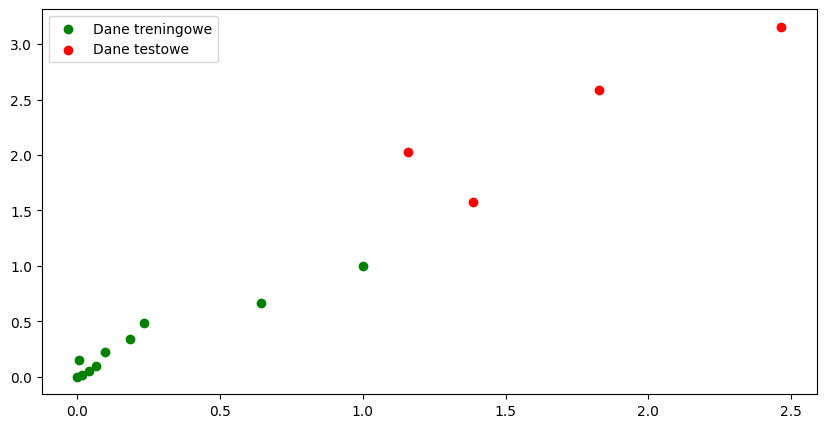

In [158]:
# Plot scaled data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color='g')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], color='r')
plt.legend(['Dane treningowe', 'Dane testowe'])
plt.show()

In [159]:
# Fit the model
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train_scaled, y_train)

LinearRegression()

### Predictions

In [162]:
# Get predictions
y_pred = multiple_linear_regression.predict(X_test_scaled)

In [165]:
for i in range(len(y_pred)):
    print(f"Prediction for year {test_df.index[i]}: {y_pred[i]:.2f} $ (actual: {y_test[i]:.2f} $)")

Prediction for year 2018: 63073.78 $ (actual: 55838.00 $)
Prediction for year 2019: 75733.75 $ (actual: 70697.00 $)
Prediction for year 2020: 99678.27 $ (actual: 85965.00 $)
Prediction for year 2021: 123733.11 $ (actual: 117929.00 $)


### Plot predictions

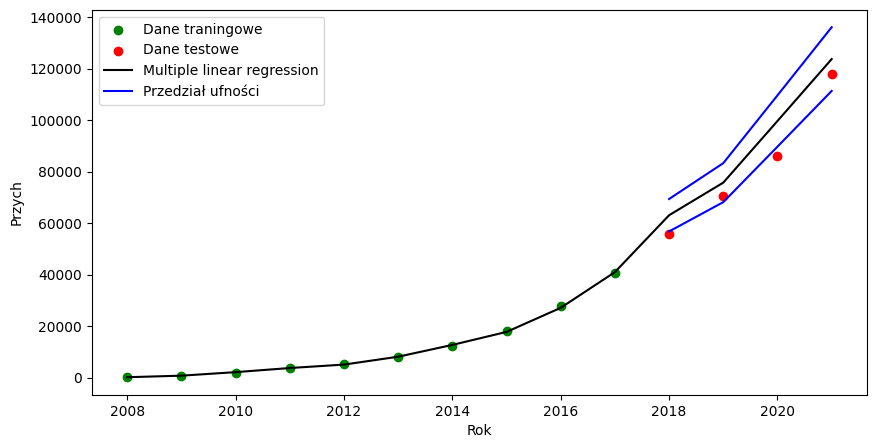

In [166]:
# Plot multiple linear regression with train and test data
confidence_interval = 0.1
X = np.concatenate((X_train_scaled, X_test_scaled))
y_pred = multiple_linear_regression.predict(X_test_scaled)
y_pred_min = y_pred - confidence_interval * y_pred
y_pred_max = y_pred + confidence_interval * y_pred
train_test_df = pd.concat([train_df, test_df])
plt.scatter(train_df.index, y_train, color='g')
plt.scatter(test_df.index, y_test, color='r')
plt.plot(train_test_df.index, multiple_linear_regression.predict(X), color='k')
plt.plot(test_df.index, y_pred_min, color='b')
plt.plot(test_df.index, y_pred_max, color='b')
plt.xlabel('Rok')
plt.ylabel('Przych')
plt.legend(['Dane traningowe', 'Dane testowe', 'Multiple linear regression', 'Przedział ufności'])
plt.show()

### Evaluate the model

In [167]:
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")

Mean Absolute Error: 7947.48
Mean Squared Error: 74866711.53
Root Mean Squared Error: 8652.56


## Logistic regression

In [74]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

In [86]:
# Prepare data for logistic regression
X_train = train_df.drop("Przych", axis=1)
y_train = train_df["Przych"].values.reshape(-1, 1)
X_test = test_df.drop("Przych", axis=1)
y_test = test_df["Przych"].values.reshape(-1, 1)

In [76]:
# Fit the model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/root/repo/med_lab/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/repo/med_lab/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Plot logistic regression

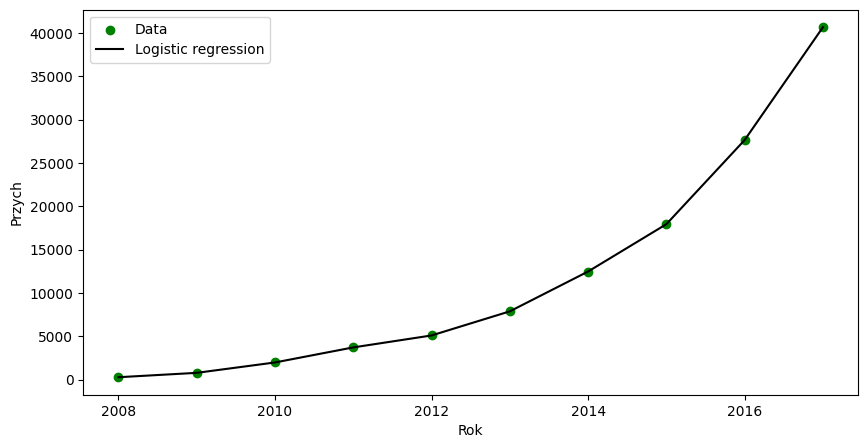

In [29]:
# Plot logistic regression equation with train data
plt.scatter(train_df.index, y_train, color='g')
plt.plot(train_df.index, logistic_regression.predict(X_train), color='k')
plt.xlabel('Rok')
plt.ylabel('Przych')
plt.legend(['Data', 'Logistic regression'])
plt.show()

### Predictions

In [64]:
# Get predictions
y_pred = logistic_regression.predict(X_test)

In [68]:
for i in range(len(y_pred)):
    print(f"Prediction for year {test_df.index[i]}: {y_pred[i]:.2f} $ (actual: {y_test[i][0]:.2f} $)")

Prediction for year 2018: 40653.00 $ (actual: 55838.00 $)
Prediction for year 2019: 17928.00 $ (actual: 70697.00 $)
Prediction for year 2020: 12466.00 $ (actual: 85965.00 $)
Prediction for year 2021: 12466.00 $ (actual: 117929.00 $)


### Plot predictions

/root/repo/med_lab/.venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


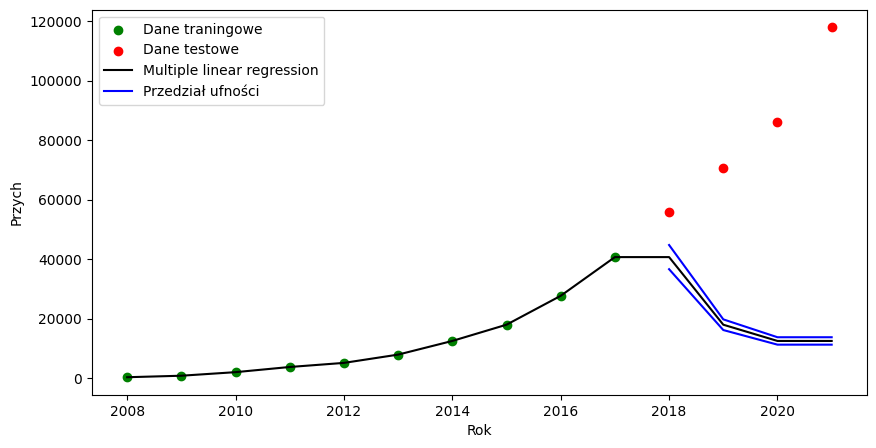

In [77]:
# Plot logistic linear regression with train and test data
confidence_interval = 0.1
X = np.concatenate((X_train, X_test))
y_pred = logistic_regression.predict(X_test)
y_pred_min = y_pred - confidence_interval * y_pred
y_pred_max = y_pred + confidence_interval * y_pred
train_test_df = pd.concat([train_df, test_df])
plt.scatter(train_df.index, y_train, color='g')
plt.scatter(test_df.index, y_test, color='r')
plt.plot(train_test_df.index, logistic_regression.predict(X), color='k')
plt.plot(test_df.index, y_pred_min, color='b')
plt.plot(test_df.index, y_pred_max, color='b')
plt.xlabel('Rok')
plt.ylabel('Przych')
plt.legend(['Dane traningowe', 'Dane testowe', 'Logistic linear regression', 'Przedział ufności'])
plt.show()

### Evaluate the model

In [71]:
# Import metrics
from sklearn import metrics

In [72]:
# Print metrics
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")

Mean Absolute Error: 61729.00
Mean Squared Error: 4884924739.00
Root Mean Squared Error: 69892.24


### Look at the model coefficients

In [143]:
# Print logistic regression equation
print(f"Intercept: {logistic_regression.intercept_[0]:.2f}")
print(f"Coefficients: {logistic_regression.coef_[0]}")

Intercept: -0.62
Coefficients: [-0.12517827 -0.15189586 -0.75683406]


## Decision tree

In [78]:
# Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [79]:
# Prepare data for decision tree regressor
X_train = train_df.drop("Przych", axis=1)
y_train = train_df["Przych"].values.reshape(-1, 1)
X_test = test_df.drop("Przych", axis=1)
y_test = test_df["Przych"].values.reshape(-1, 1)

In [80]:
# Fit the model
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Plot decision tree

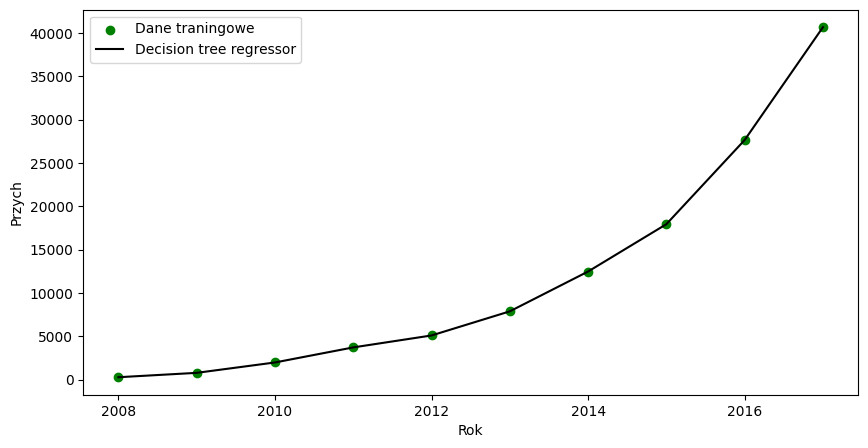

In [81]:
# Plot decision tree regressor equation with train data
plt.scatter(train_df.index, y_train, color='g')
plt.plot(train_df.index, decision_tree_regressor.predict(X_train), color='k')
plt.xlabel('Rok')
plt.ylabel('Przych')
plt.legend(['Dane traningowe', 'Decision tree regressor'])
plt.show()

### Predictions

In [82]:
# Get predictions
y_pred = decision_tree_regressor.predict(X_test)

In [83]:
for i in range(len(y_pred)):
    print(f"Prediction for year {test_df.index[i]}: {y_pred[i]:.2f} $ (actual: {y_test[i][0]:.2f} $)")

Prediction for year 2018: 40653.00 $ (actual: 55838.00 $)
Prediction for year 2019: 40653.00 $ (actual: 70697.00 $)
Prediction for year 2020: 40653.00 $ (actual: 85965.00 $)
Prediction for year 2021: 40653.00 $ (actual: 117929.00 $)


## Summary

Linear Regression: The Mean Absolute Error (MAE) for the linear regression model is 43308.77. The MAE measures the average absolute difference between the predicted and actual values. In this case, the high MAE value indicates that the linear regression model is not a good fit for the data, and it is not accurately predicting the target variable.

Multiple Linear Regression: The MAE for the multiple linear regression model is 7947.48, which is significantly lower than the MAE for the linear regression model. This suggests that the multiple linear regression model is a better fit for the data, and it is accurately predicting the target variable.

Logistic Regression: The MAE for the logistic regression model is 61729.00, which is higher than both the linear regression and multiple linear regression models. Logistic regression is typically used for classification problems, and it is not the appropriate model to use for predicting continuous variables like the target variable in this dataset.

Decision tree: The model is overfitting the training data and failing to generalize to new data. There is too few data to train the model.

In summary, the multiple linear regression model performs the best among the three models, with the lowest MAE value. Therefore, it is the recommended model to use for predicting the target variable in this dataset.